In [20]:
#######correlate immune pathways
################
#load pathway scores
#####
load("/home/zhuxq/nas/Xiaoqiang/opti.data/signatureVSimmune/CRC.immu.sigs.score/genesets17s.score.RData")
######immuscore
immuscore=read.table("/home/zhuxq/nas/Xiaoqiang/opti.data/signatureVSimmune/CRC.immu.sigs.score/estimate/CRC_estimate_score.illumina.txt",header=T,row.names = 1)
rownames(immuscore)=gsub("[.]","-",rownames(immuscore))
#load CRC gene expression matrix
######
load("/home/zhuxq/nas/Xiaoqiang/opti.data/signatureVSimmune/CRC.immu.sigs.score/expMatrixCRC.RData")
####

In [40]:
immg=c("LAG3","TNFRSF14","BTLA","CD86","CD80","CTLA4","PDCD1LG2","CD274","PDCD1","CD8A","HAVCR2")
#####
immgM=as.data.frame(t(expM[immg,]))
######
score.data=cbind(immuscore$ImmuneScore, genesets17s.score[rownames(immuscore),], immgM[rownames(immuscore),] )
colnames(score.data)[1]="immuscore"
dim(score.data)

[1] 677  29

In [45]:
###get the TE expression
load("~/nas/Xiaoqiang/opti.data/1.CGC.TE.CRC.REdiscoverTE/output.plot/tmp.RData")
load('~/nas/Xiaoqiang/opti.data//1.CGC.TE.CRC.REdiscoverTE/stats.20200311/1.TE.used/TE.label.used.RData')
###inclue TE used
#head(cdrep)
#table(cdrep$repClass.new2)
cdrep.sel=subset(cdrep, !(repClass.new2=="other.repeats"))
#dim(cdrep.sel)
###TE matrix selection
te.tumorexp.sel=te.tumorexp[, colnames(te.tumorexp) %in% rownames(cdrep.sel)]
#te.tumorexp.sel[1:4,1:4]
#dim(te.tumorexp.sel)
######
ids=intersect(rownames(te.tumorexp.sel), rownames(score.data))

In [47]:
dim(scoreM)
dim(teM)
#####get the R and pvalue of spearman correlation
cor.score=score.data[ids,]
cor.exp=te.tumorexp.sel[ids,]
datalist=list()
oklist=list()
for (i in 1:ncol(cor.exp)) {
  for (j in 1:ncol(cor.score)) {
    res <- cor.test(cor.exp[,i], cor.score[,j],  method = "spearman")
    pvalue=res$p.value
    cor=res$estimate
    res=data.frame(pvalue, cor)
    rownames(res)=colnames(cor.score)[j]
    rownames(res)=paste(colnames(cor.exp)[i], rownames(res),sep = "and")
    datalist[[j]] <- res
  }
  oklist[[i]]=do.call(rbind, datalist)
}
res.cor=do.call(rbind, oklist)
res.cor.29s=res.cor
save(res.cor.29s, 
     file="/home/zhuxq/nas/Xiaoqiang/opti.data/1.CGC.TE.CRC.REdiscoverTE/stats.20200311/3.immu.correlated/res.cor.29s.RData")
####################################

[1] 617  29

[1]  617 1072

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(cor.exp[, i], cor.score[, j], method = "spearman"):
“Cannot c

In [52]:
#use tumor purity as covariance
purdata=read.csv("/home/zhuxq/nas/Xiaoqiang/opti.data/1.CGC.TE.CRC.REdiscoverTE/output.plot/immune/tcga.tumor.purity.csv",header = T)
purdata=subset(purdata, Cancer.type=="COAD"|Cancer.type=="READ")
purdata$id=substr(purdata$Sample.ID,1,15)
purdata$idd=substr(purdata$Sample.ID,16,16)
purdata=subset(purdata,idd=="A")
rownames(purdata)=purdata$id
length(intersect(rownames(purdata),rownames(cor.score)))
cor.score.new=cbind(purdata[rownames(cor.score),]$IHC,cor.score)
colnames(cor.score.new)[1]="IHC"
#summary(cor.score.new$IHC)
cor.score.new=subset(cor.score.new, IHC>0)
dim(cor.score.new)
cor.exp.new=cor.exp[rownames(cor.score.new),]
cor.score.new[1:4,1:4]
cor.exp.new[1:4,1:4]

[1] 617

[1] 616  30

,IHC,immuscore,Antigen_Processing_and_Presentation,Antimicrobials
,<dbl>,<dbl>,<dbl>,<dbl>
TCGA-3L-AA1B-01,0.70,-862.3796,0.6568603,0.5635727
TCGA-4N-A93T-01,0.75,-1397.6721,0.5313860,0.4465816
TCGA-4T-AA8H-01,0.60,-1699.8725,0.3620186,0.5209001
TCGA-5M-AAT4-01,0.70,-1644.8631,0.5893766,0.3488640


,ACRO1,ALR/Alpha,Alu,AluJb
,<dbl>,<dbl>,<dbl>,<dbl>
TCGA-3L-AA1B-01,-1.23700135,3.297682,-0.7258298,7.493645
TCGA-4N-A93T-01,-0.81356339,1.955835,-0.6162215,7.978005
TCGA-4T-AA8H-01,2.33785614,2.562055,-0.9357847,7.784363
TCGA-5M-AAT4-01,-0.04531771,3.181040,-1.0839568,7.568818


In [56]:
####adjusted by purity
datalist=list()
oklist=list()
library(ppcor)
for (i in 2:ncol(cor.score.new)) {
  subdata=cbind(cor.score.new[,c(1,i)],cor.exp.new)
  subdata=na.omit(subdata,cols=colnames(subdata)[2])
    #
  for (j in 3:ncol(subdata)) {
    #res <- pcor.test(cor.exp.new[,i], cor.score.new[,j], cor.score.new[,1],method = "spearman")
    res <- pcor.test(subdata[,2], subdata[,j], subdata[,1],method = "spearman")
    pvalue=res$p.value
    cor=res$estimate
    res=data.frame(pvalue, cor)
    rownames(res)=colnames(subdata)[j]
    rownames(res)=paste(colnames(subdata)[2], rownames(res),sep = "&")
    datalist[[j]] <- res
  }
  oklist[[i]]=do.call(rbind, datalist)
}

res.Pcor.29s=do.call(rbind, oklist)
save(res.Pcor.29s, 
     file="/home/zhuxq/nas/Xiaoqiang/opti.data/1.CGC.TE.CRC.REdiscoverTE/stats.20200311/3.immu.correlated/res.pcor.29s.RData")
#################

In [149]:
res.Pcor.29s$id=rownames(res.Pcor.29s)
library(tidyr)
res.Pcor.29s=tidyr::separate(res.Pcor.29s, col = id, into = c("geneset","repName"),sep = "&")
res.Pcor.29s.pos.sig=subset(res.Pcor.29s, cor >=0.2)
#

In [150]:
te.counts=as.data.frame(table(res.Pcor.29s.pos.sig$repName))
colnames(te.counts)=c("repName","count")
rownames(te.counts)=te.counts$repName
te.counts=te.counts[order(te.counts$count,decreasing = T),]
te.counts=cbind(te.counts, cdrep[rownames(te.counts),])

In [24]:
#
library(ggplot2)
library(ggpubr)
cbPalette= c("#1f78b4","#d95f02","#7570b3","#e7298a","#e6ab02","#66a61e")
p1=ggbarplot(te.counts[which(te.counts$count>1),-1], x = "repName", y = "count",
          fill = "repClass.new2",               # change fill color by cyl
          color = "white",            # Set bar border colors to white
          #color = "#525252", 
          palette = cbPalette,            # jco journal color palett. see ?ggpar
          sort.val = "asc",          # Sort the value in dscending order
          sort.by.groups = TRUE,     # Don't sort inside each group
          x.text.angle = 90,           # Rotate vertically x axis texts
          ggtheme = theme_pubclean()
)+
  #font("x.text", size = 5, vjust = 0.5)+
  theme(axis.text.x = element_text(size=8))+
  ylab(paste0("Potentially immunogenic","\n", "with number of immue sets"))+ggtitle("TEs at least postively correlated with 2 immune sets")
generate.PDF <- function(pbmc) {
  #pdf("bar.top.200.of.781.tes.counts.geneset.pdf",width = 10,height = 5)
  pdf("3.immu.correlated/bar.total.613.tes.counts.geneset.1.pdf",width = 20,height = 5)
  print(p1)
  dev.off()
}
generate.PDF(pbmc)

png 
  2

In [40]:
head(te.counts[which(te.counts$count>1),-1])

,count,repName,repFamily,repClass,repClass.new,repClass.new2
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
HERVL74-int,20,HERVL74-int,ERVL,LTR,LTR,LTR
LTR21B,20,LTR21B,ERV1,LTR,LTR,LTR
MER45A,19,MER45A,hAT-Tip100,DNA,DNA,DNA
HERV1_LTRd,18,HERV1_LTRd,ERV1,LTR,LTR,LTR
MER65C,18,MER65C,ERV1,LTR,LTR,LTR
HERV15-int,16,HERV15-int,ERV1,LTR,LTR,LTR


In [22]:
#pie
library(ggplot2)
library(scales)
dfpie.pos <- as.data.frame(table(te.counts$repClass.new2))
colnames(dfpie.pos)[1]="TE.class"
head(dfpie.pos)
rownames(dfpie.pos)=dfpie.pos$TE.class
#############################################
colors <- c("#377eb8","#4daf4a","#e41a1c",'#27408B', '#FF0000', '#2E8B57', '#CD00CD', '#EE7942','#009ACD')
colors=c("#1f78b4","#d95f02","#7570b3","#e7298a","#66a61e","#e6ab02")
slices <- dfpie.pos$Freq
lbls <- dfpie.pos$TE.class
pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, pct) # add percents to labels 
lbls <- paste(lbls,"%",sep="") # ad % to labels 
library(ggplotify)
pdf("3.immu.correlated/pie.chart.613.tes.positive.pdf",width = 7,height = 7)
pie(slices,labels = lbls, col=colors,radius = 0.5,
        main=paste0("Proportion of 613", "\n","positive TEs at class level"))
dev.off()

,TE.class,Freq
,<fct>,<int>
1,DNA,132
2,LINE,133
3,LTR,290
4,Retroposon,5
5,Satellite,9
6,SINE,44


png 
  2

In [151]:
#####load survival stats
#######
load("2.survival.TE.screen/sur.res.combined.endpoints.RData")
write.csv(cb.data, "2.survival.TE.screen/cb.data.csv")

In [53]:
sur.total.id=unique(cb.data$repName)
length(intersect(rownames(te.counts), sur.total.id))

#cndi.id=intersect(rownames(te.counts), sur.total.id)
cndi.id=intersect(rownames(te.counts[which(te.counts$count>1),-1]), sur.total.id)

cndi.rep=cdrep[rownames(cdrep) %in% cndi.id, ]
table(cndi.rep$repClass.new2)
head(cndi.rep)
rownames(cndi.rep)
dim(cndi.rep)
##############

[1] 166


       DNA       LINE        LTR Retroposon  Satellite       SINE 
        10          5         41          2          4          9 

,repName,repFamily,repClass,repClass.new,repClass.new2
,<chr>,<chr>,<chr>,<chr>,<chr>
AluSp,AluSp,Alu,SINE,SINE,SINE
AluSq4,AluSq4,Alu,SINE,SINE,SINE
AluSz6,AluSz6,Alu,SINE,SINE,SINE
AluYa5,AluYa5,Alu,SINE,SINE,SINE
AluYj4,AluYj4,Alu,SINE,SINE,SINE
Charlie19a,Charlie19a,hAT-Charlie,DNA,DNA,DNA


[1] "AluSp"        "AluSq4"       "AluSz6"       "AluYa5"       "AluYj4"      
 [6] "Charlie19a"   "Charlie7a"    "Charlie8"     "D20S16"       "ERVL-B4-int" 
[11] "FAM"          "FRAM"         "HERV1_LTRd"   "HERVH48-int"  "HERVP71A-int"
[16] "Kanga1a"      "L1MB1"        "L1MEh"        "L1PA12"       "L1PB"        
[21] "LTR104_Mam"   "LTR10F"       "LTR12C"       "LTR16A"       "LTR16E2"     
[26] "LTR21B"       "LTR22"        "LTR24C"       "LTR33"        "LTR38A1"     
[31] "LTR52"        "LTR5B"        "LTR7B"        "LTR82B"       "LTR85b"      
[36] "MamGypLTR2b"  "MamGypLTR3a"  "MER101"       "MER11D"       "MER1A"       
[41] "MER1B"        "MER31A"       "MER34"        "MER48"        "MER57F"      
[46] "MER65B"       "MER65C"       "MER68-int"    "MER81"        "MER83B"      
[51] "MER9a3"       "MIR1_Amn"     "MIR3"         "MLT1F-int"    "MLT1I"       
[56] "MLT1K"        "MLT2B4"       "MSTA"         "MSTA-int"     "SATR1"       
[61] "SATR2"        "SVA_C"        "SVA_F"        "TAR1"         "THE1-int"    
[66] "THE1B-int"    "THE1C-int"    "Tigger11a"    "Tigger12A"    "Tigger3c"    
[71] "X7A_LINE"

[1] 71  5

,msi,os_status,dfs_status
,<fct>,<int>,<int>
TCGA-3L-AA1B-01,NA,NA,NA
TCGA-4N-A93T-01,NA,NA,NA
TCGA-4T-AA8H-01,NA,NA,NA
TCGA-5M-AAT4-01,NA,NA,NA
TCGA-5M-AAT5-01,NA,NA,NA
TCGA-5M-AAT6-01,NA,NA,NA


png 
  2

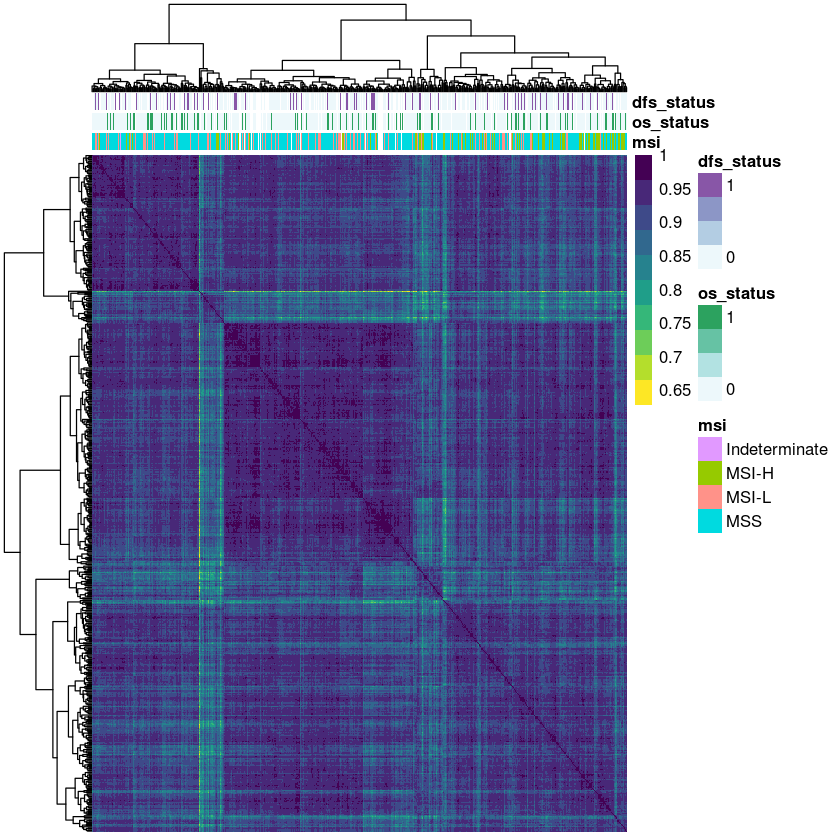

In [54]:

#correlation matrix
save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
  stopifnot(!missing(x))
  stopifnot(!missing(filename))
  pdf(filename, width=width, height=height)
  grid::grid.newpage()
  grid::grid.draw(x$gtable)
  dev.off()
}
library(RColorBrewer)
library(pheatmap)
da1=te.tumorexp.sel[, colnames(te.tumorexp.sel) %in% cndi.rep$repName]
dat <- as.data.frame(t(da1))
dist_dat  <- cor(dat,method="spearman")
hc <- hclust(as.dist(1-dist_dat),method="ward.D2")
#mycolor = colorRampPalette(c("white","red"))(10)
#mycolor=colorRampPalette(rev(brewer.pal(n = 7, name ="RdYlBu")))(8)
#mycolor=colorRampPalette(rev(brewer.pal(11, "RdBu")))(256)
library(viridis)
library(pheatmap)
mycolor=col = rev(viridis(10))
###
######get the clinical infor
ann.col=data.frame(msi=clin.CRC.full.sel$msi,
                  os_status=clin.CRC.full.sel$os_status,
                  dfs_status=clin.CRC.full.sel$dfs_status)
rownames(ann.col)=rownames(clin.CRC.full.sel)
ann.col=ann.col[rownames(da1),]

head(ann.col)
#
ptt=pheatmap(dist_dat,show_rownames = F,border_color = NA,
              show_colnames = F,cluster_rows = hc,
              cluster_cols =hc,
              annotation_col = ann.col,
              color=mycolor, annotation_legend = T
              #annotation_colors  = list(response = c("PD" = "#dd1c77","PRCR"="#74c476","SD"="#feb24c"),
               #                         treatment.status=c("On"="#74a9cf", "Pre"="#f768a1"))
              )
save_pheatmap_pdf(ptt, "/home/zhuxq/nas/Xiaoqiang/opti.data/1.CGC.TE.CRC.REdiscoverTE/stats.20200311/ht.cor.166.tes.pdf")
###


In [36]:
dim(clin.CRC.full.sel)
dim(clu)

[1] 618  76

[1] 618   2

In [55]:
clu=as.data.frame(sort(cutree(ptt$tree_col, k=3)))
colnames(clu)="pt.clu3"
clu$pt.clu3=paste("cluster",clu$pt.clu3,sep = "_")
clu$idss=rownames(clu)
table(clu$pt.clu3)
#head(clu)
idclu=intersect(rownames(clu), rownames(CRC.survivaldata))
#####
surstats=cbind(clu[idclu,], CRC.survivaldata[idclu,])
surstats=cbind(surstats, clin.CRC.full.sel[rownames(surstats),])
table(surstats$msi, surstats$pt.clu3)
chisq.test(surstats$msi, surstats$pt.clu3)
#head(surstats)


cluster_1 cluster_2 cluster_3 
      222       243       153 

               
                cluster_1 cluster_2 cluster_3
  Indeterminate         0         0         1
  MSI-H                10        64        10
  MSI-L                45        28        26
  MSS                 147       145       116

Warning message in chisq.test(surstats$msi, surstats$pt.clu3):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  surstats$msi and surstats$pt.clu3
X-squared = 59.465, df = 6, p-value = 5.782e-11


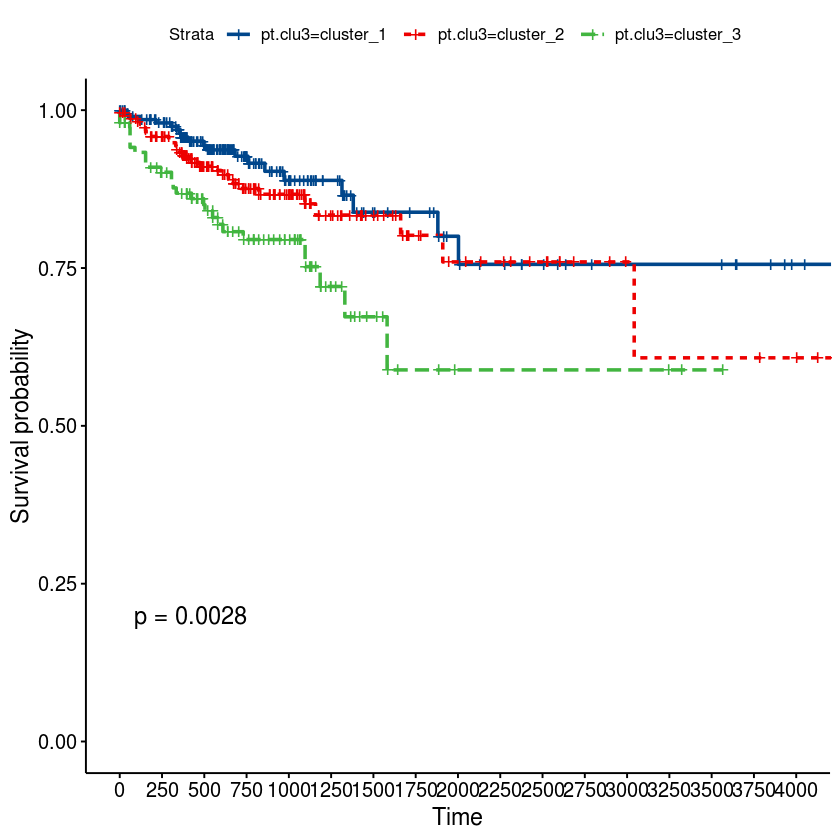

In [56]:
######
require("survival")
require("survminer")
#fit<- survfit(Surv(DSS.time, DSS) ~ pt.clu3, data = subset(surstats,pt.clu3=="cluster_1" | pt.clu3=="cluster_3" ))
fit<- survfit(Surv(DSS.time, DSS) ~ pt.clu3, data = surstats)
ggsurvplot(fit,  size = 1,  # change line size
           linetype = "strata", # change line type by groups
           break.time.by = 250, # break time axis by 250
           palette = "lancet", # custom color palette
           conf.int = F, # Add confidence interval
           pval = TRUE # Add p-value
)

In [57]:
ann.col.new=cbind(ann.col, clu[rownames(ann.col),])[,1:4]
table(ann.col.new$pt.clu3)
head(ann.col.new)


cluster_1 cluster_2 cluster_3 
      222       243       153 

,msi,os_status,dfs_status,pt.clu3
,<fct>,<int>,<int>,<chr>
TCGA-3L-AA1B-01,NA,NA,NA,cluster_1
TCGA-4N-A93T-01,NA,NA,NA,cluster_2
TCGA-4T-AA8H-01,NA,NA,NA,cluster_1
TCGA-5M-AAT4-01,NA,NA,NA,cluster_1
TCGA-5M-AAT5-01,NA,NA,NA,cluster_1
TCGA-5M-AAT6-01,NA,NA,NA,cluster_2



cluster_1 cluster_2 cluster_3 
      587        30         1 

           
            Indeterminate MSI-H MSI-L MSS
  cluster_1             1    78    92 393
  cluster_2             0     6     7  15
  cluster_3             0     0     0   1

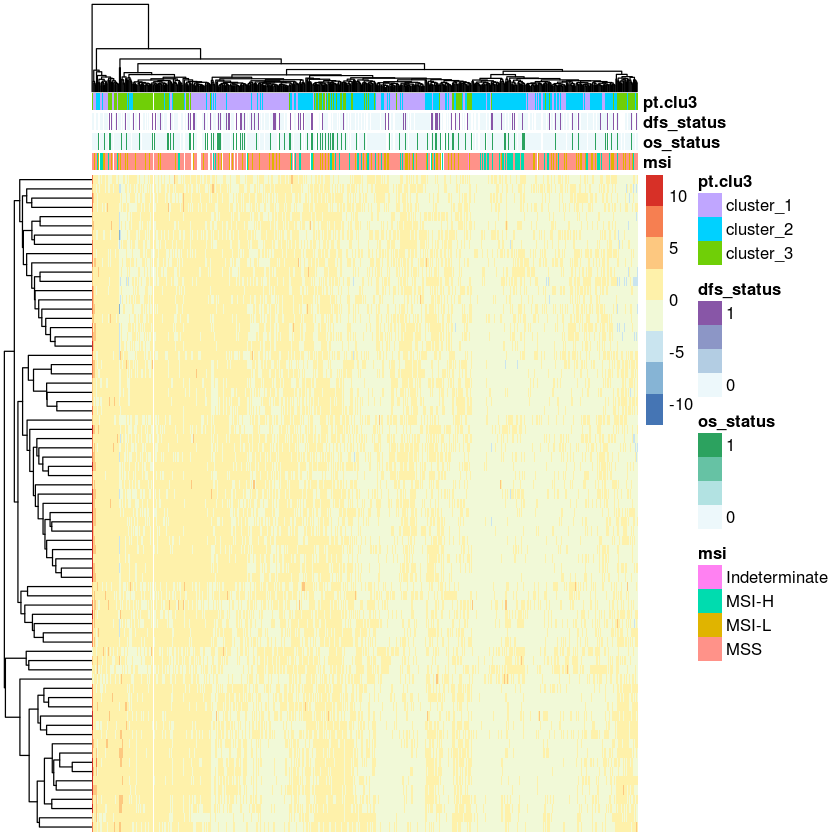

In [58]:

pp1=pheatmap(dat,show_rownames = F,border_color = NA,
              show_colnames = F,
              #cluster_rows = hc,
              #cluster_cols =hc,
              annotation_col = ann.col.new,
              scale="row",
              color=colorRampPalette(rev(brewer.pal(n = 7, name ="RdYlBu")))(8), 
              annotation_legend = T
              #annotation_colors  = list(response = c("PD" = "#dd1c77","PRCR"="#74c476","SD"="#feb24c"),
               #                         treatment.status=c("On"="#74a9cf", "Pre"="#f768a1"))
              )

clu=as.data.frame(sort(cutree(pp1$tree_col, k=3)))
colnames(clu)="pt.clu3"
clu$pt.clu3=paste("cluster",clu$pt.clu3,sep = "_")
clu$idss=rownames(clu)
table(clu$pt.clu3)
clu=cbind(clu, ann.col[rownames(clu),])
table(clu$pt.clu3, clu$msi)

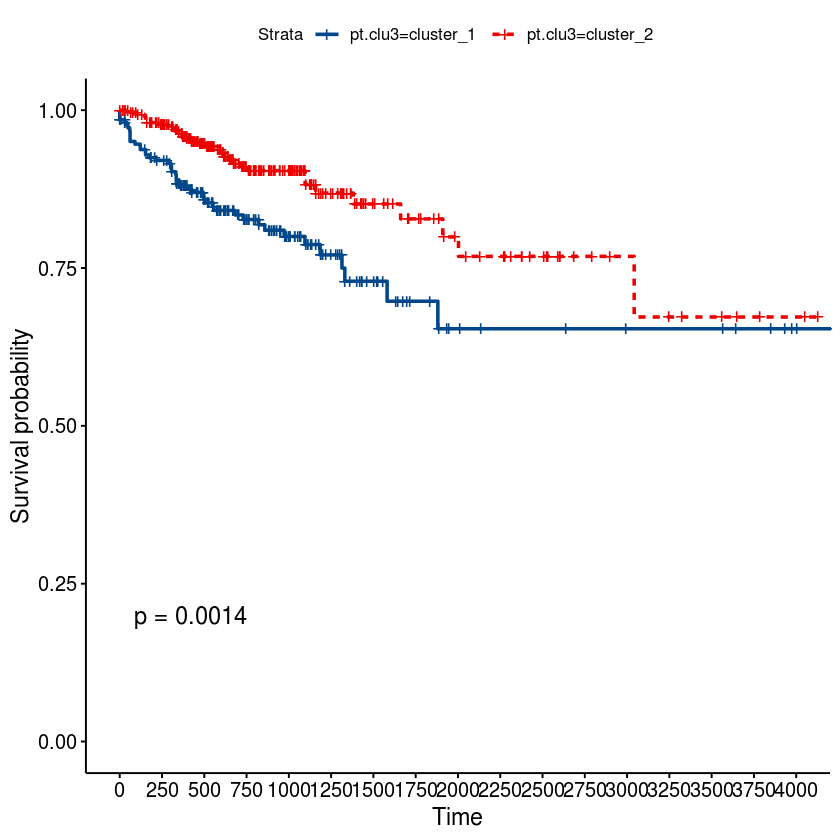

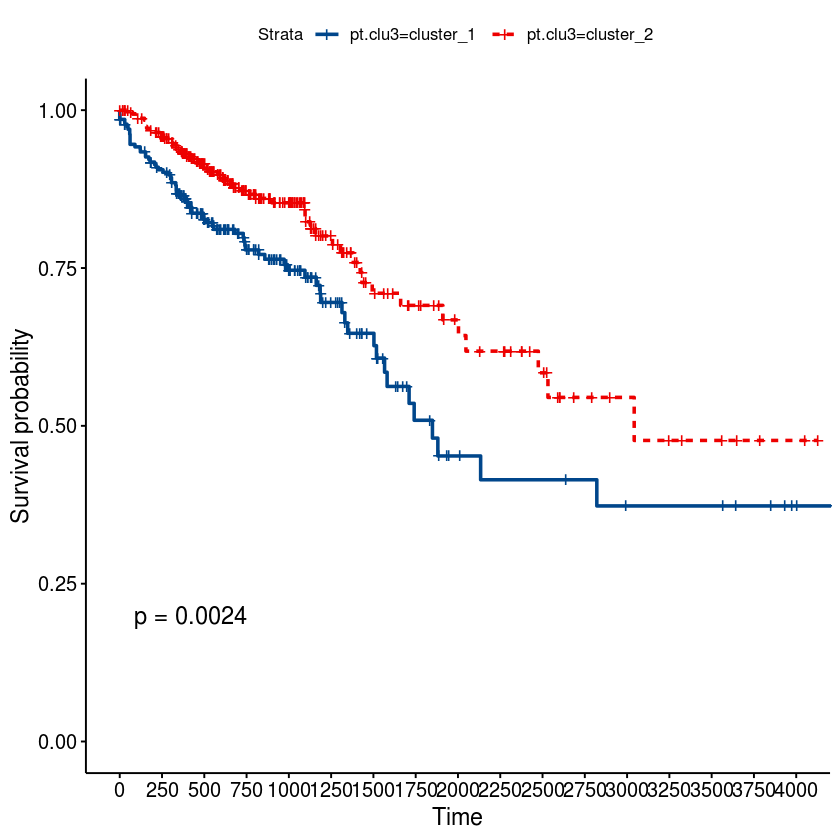

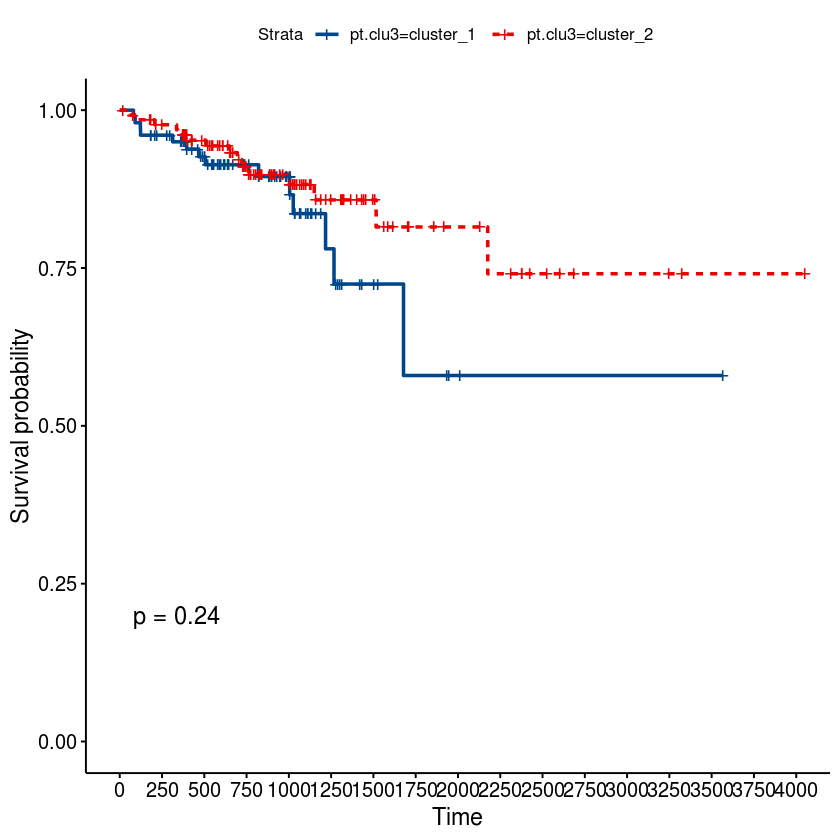

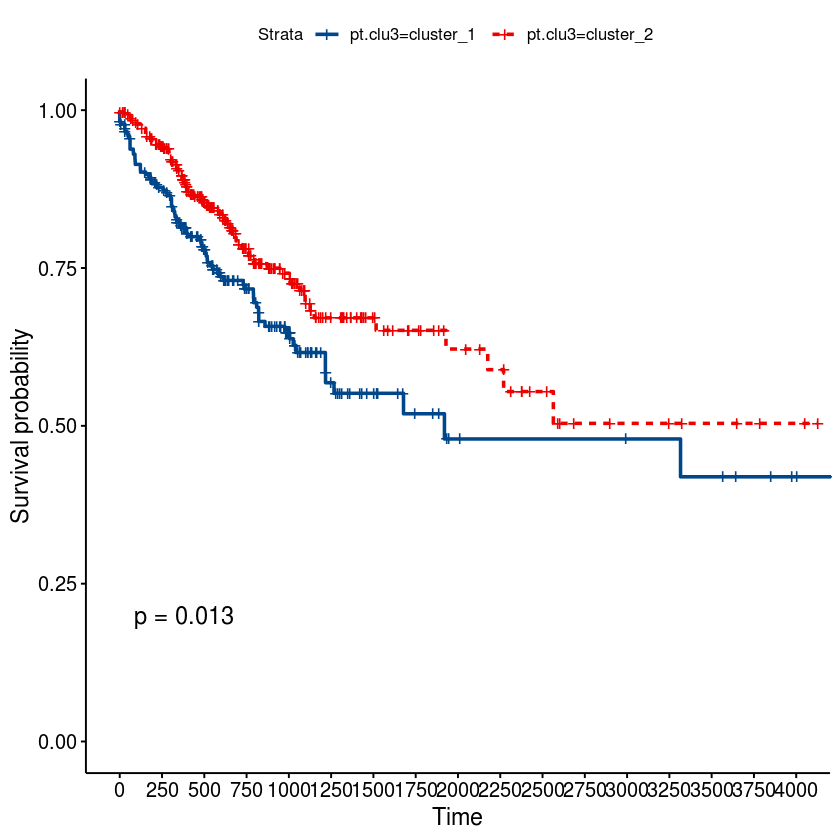

In [157]:

#head(clu)
idclu=intersect(rownames(clu), rownames(CRC.survivaldata))
#####
surstats=cbind(clu[idclu,], CRC.survivaldata[idclu,])
#head(surstats)
require("survival")
require("survminer")
fit<- survfit(Surv(DSS.time, DSS) ~ pt.clu3, data = subset(surstats, !(pt.clu3=="cluster_3") ))
ggsurvplot(fit,  size = 1,  # change line size
           linetype = "strata", # change line type by groups
           break.time.by = 250, # break time axis by 250
           palette = "lancet", # custom color palette
           conf.int = F, # Add confidence interval
           pval = TRUE # Add p-value
)
fit<- survfit(Surv(OS.time, OS) ~ pt.clu3, data = subset(surstats, !(pt.clu3=="cluster_3") ))
ggsurvplot(fit,  size = 1,  # change line size
           linetype = "strata", # change line type by groups
           break.time.by = 250, # break time axis by 250
           palette = "lancet", # custom color palette
           conf.int = F, # Add confidence interval
           pval = TRUE # Add p-value
)
fit<- survfit(Surv(DFI.time, DFI) ~ pt.clu3, data = subset(surstats, !(pt.clu3=="cluster_3") ))
ggsurvplot(fit,  size = 1,  # change line size
           linetype = "strata", # change line type by groups
           break.time.by = 250, # break time axis by 250
           palette = "lancet", # custom color palette
           conf.int = F, # Add confidence interval
           pval = TRUE # Add p-value
)
fit<- survfit(Surv(PFI.time, PFI) ~ pt.clu3, data = subset(surstats, !(pt.clu3=="cluster_3") ))
ggsurvplot(fit,  size = 1,  # change line size
           linetype = "strata", # change line type by groups
           break.time.by = 250, # break time axis by 250
           palette = "lancet", # custom color palette
           conf.int = F, # Add confidence interval
           pval = TRUE # Add p-value
)

In [164]:
tclu=subset(clu, !(pt.clu3=="cluster_3")& !(msi=="Indeterminate") )
table(tclu$pt.clu3,tclu$msi)
chisq.test(tclu$pt.clu3,tclu$msi)

           
            Indeterminate MSI-H MSI-L MSS
  cluster_1             0    27    46 184
  cluster_2             0    57    53 224


	Pearson's Chi-squared test

data:  tclu$pt.clu3 and tclu$msi
X-squared = 5.1867, df = 2, p-value = 0.07477


In [165]:
save.image(file="/home/zhuxq/nas/Xiaoqiang/opti.data/1.CGC.TE.CRC.REdiscoverTE/stats.20200311/tmp.sur.immu.overlap.RData")